<a href="https://colab.research.google.com/github/arthur-cerceau/arthur-cerceau/blob/main/Imers%C3%A3o_dados_4_Pesquisa_de_im%C3%B3veis_em_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Notebook relativo ao estudo de caso da 4ª Imersão Dados da Alura

In [4]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Importando a base de dados

url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205\
ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv?raw=true'
df = pd.read_csv(url)

df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [10]:
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7484,Rua Conde D'Eu,Santo Amaro,São Paulo,150,3,3,2,R$ 2.100.000
8918,NaN,Cidade Jardim,São Paulo,350,4,5,4,R$ 2.700.000
7506,Rua Comandante Ismael Guilherme,Jardim Luzitânia,São Paulo,600,3,6,4,R$ 12.000.000
9475,Rua Cecília Bonilha,Vila Bonilha Nova,São Paulo,193,3,3,5,R$ 749.870
239,"Rua Alexandre Teixeira, 85",Vila Euthalia,São Paulo,130,2,2,2,R$ 350.000
3971,Rua Angatuba,Pacaembu,São Paulo,300,3,2,7,R$ 2.500.000
7196,NaN,Jardim da Saúde,São Paulo,202,3,1,4,R$ 1.500.000
2841,NaN,Jardim Leonor,São Paulo,350,4,6,4,R$ 4.074.000
7741,Rua Antônio Peres Mulla,Vila Carrão,São Paulo,181,3,2,2,R$ 800.000
8289,Rua Matheus José Pires,Terceira Divisão de Interlagos,São Paulo,78,2,1,2,R$ 350.000


## Características do DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [26]:
df.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,10008.000000,10008.000000,10008.000000,10008.000000,10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,442.300659,3.483114,3.879097,4.097222,NaN
std,NaN,NaN,NaN,7515.379389,1.064200,1.988467,2.824014,NaN
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,173.000000,3.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,290.000000,3.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,460.250000,4.000000,5.000000,5.000000,NaN


## Acessar os dados relativos aos imóveis apenas no bairro Vila Mariana

In [36]:
sum((df['Bairro'] == 'Vila Mariana'))

184

In [37]:
tem_imoveis_vila = df['Bairro'] == 'Vila Mariana'
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [39]:
imoveis_vila_mariana = df[tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [41]:
# Media de metragem imoveis Vila Mariana

imoveis_vila_mariana['Metragem'].mean()

233.6195652173913

In [56]:
# Contar valores unicos de bairros no DataFrame

n_imoveis_bairro = df['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

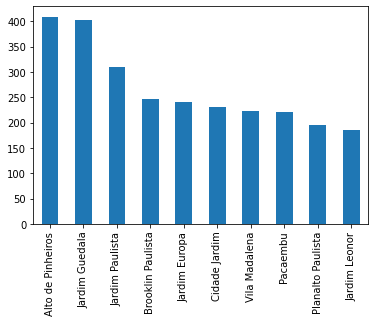

In [52]:
# Plotar a quantidade de imoveis nos 10 bairros com mais imoveis

n_imoveis_bairro.head(10).plot.bar()

# Desafios Aula 1 

## 1 - Realizar a média da metragem para cada um dos bairros

In [153]:
df.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

## 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

Segundo a documentação oficial, para acessar os dados em uma coluna específica é possivel utilizar os métodos pandas.DataFrame.column ou pandas.DataFrame["column"]



In [67]:

df['Bairro']

df.Bairro

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

## 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DataFrame (tentar colocar alguma conclusão da análise);

### 3.1 Ideias iniciais: Plotar graficos referentes ao numero de quartos, banheiros e vagas

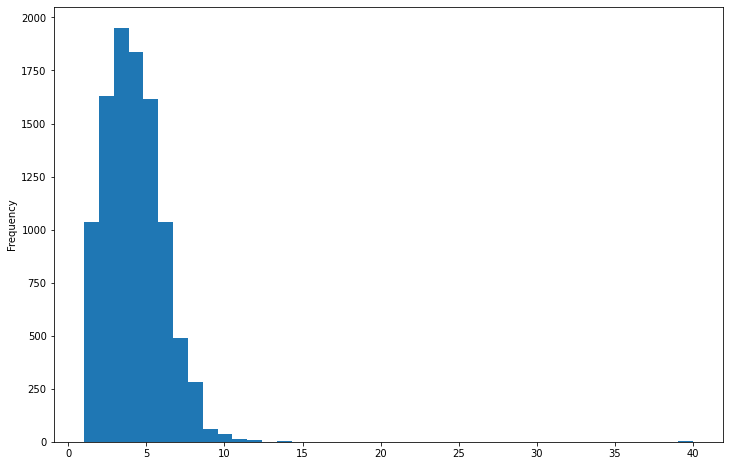

In [110]:
plt.figure(figsize=(12,8))
df.Banheiros.plot.hist(bins = 41)

Percebe-se que a maior parte do número de banheiros por imóvel é em torno de 1 a 8 banheiros. Para uma avaliação mais detalhada seria necessário remover os "outliers" do dataset.

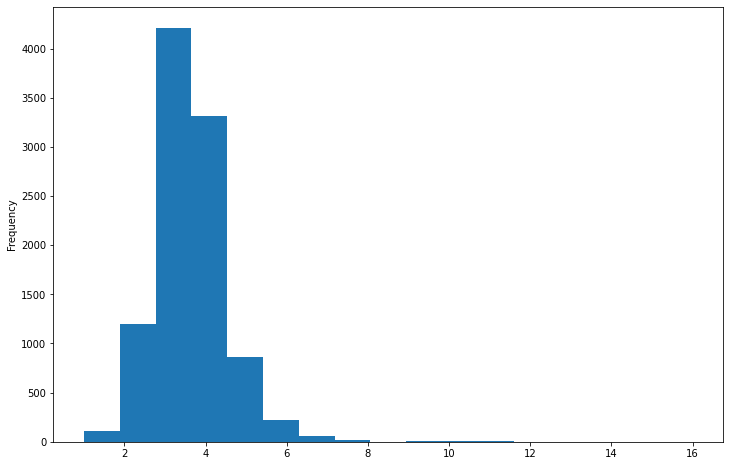

In [116]:
plt.figure(figsize=(12,8))
df.Quartos.plot.hist(bins = 17)

Novamente é possivel perceber que existe um intervalo de numero de quartos que os imóveis tendem a apresentar.

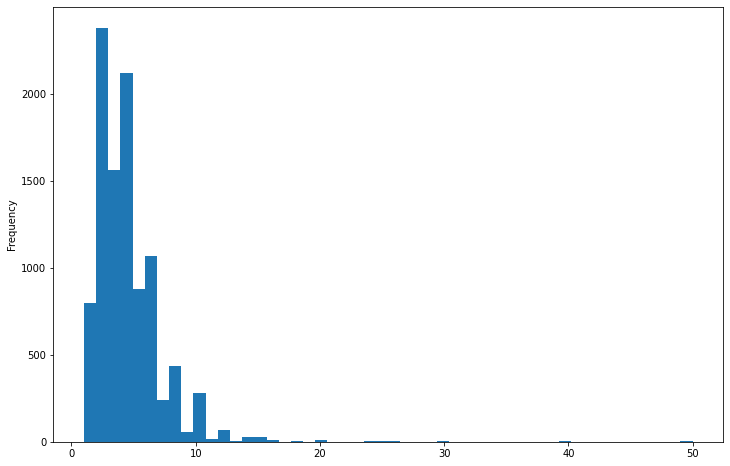

In [123]:
plt.figure(figsize=(12,8))
df.Vagas.plot.hist(bins = 50)

Percebe-se ao plotar os histogramas que alguns imóveis apresentam valores para número de banheiros, quartos e vagas muito acima da média fazendo com que o gráfico apresente uma forma assimétrica à esquerda. Sugere-se para as próximas atividades a remoção dos imóveis outliers para melhora da distribuição.

### 3.2 Plotar gráficos referentes às maiores médias de número de banheiros, quartos e vagas para avaliar se os bairros com as maiores médias são coincidentes


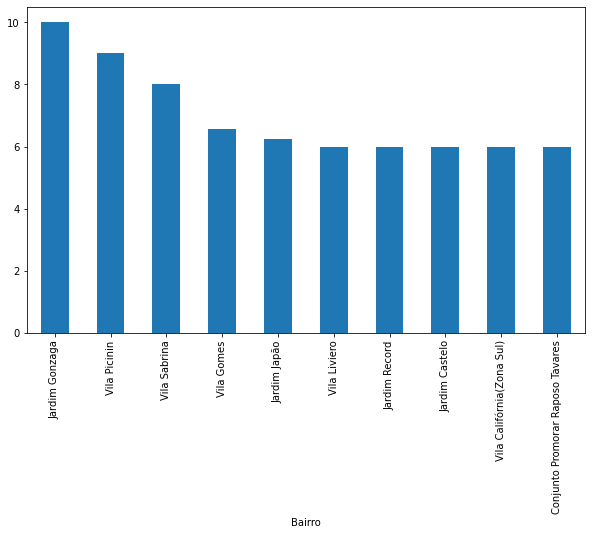

In [151]:
# Média numero de quartos por bairro
plt.figure(figsize=(10,6))
media_quartos_bairro = df.groupby("Bairro")['Quartos'].mean().sort_values(ascending = False)
media_quartos_bairro.head(10).plot.bar()

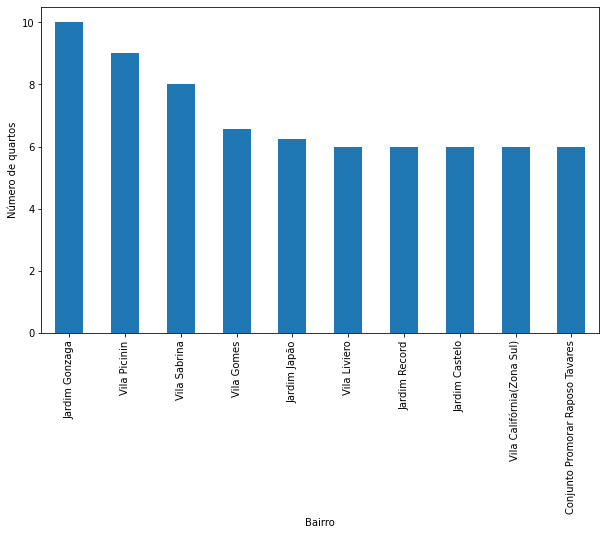

In [150]:
# Media banheiros por bairro
plt.figure(figsize=(10,6))
plt.ylabel('Número de quartos')
media_banheiros_bairro = df.groupby("Bairro")['Quartos'].mean().sort_values(ascending = False)
media_banheiros_bairro.head(10).plot.bar()

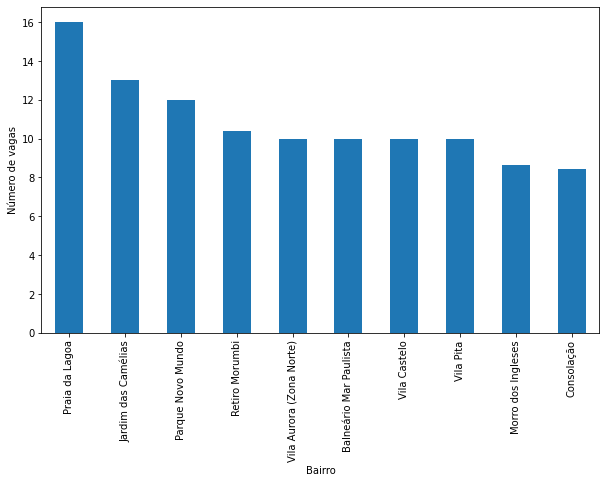

In [149]:
# Media vagas por bairro
plt.figure(figsize=(10,6))
plt.ylabel('Número de vagas')
media_vagas_bairro = df.groupby("Bairro")['Vagas'].mean().sort_values(ascending = False)
media_vagas_bairro.head(10).plot.bar()

É possível observar que a média de número de banheiros, quartos e vagas não apresenta uma tendência por bairro, isto ocorre provavalmente devido a alguns destes bairros apresentarem um baixo número de amostras.

### 3.3 Tendencia de aumento na metragem por número de banheiros, quartos e vagas, removendo os outliers


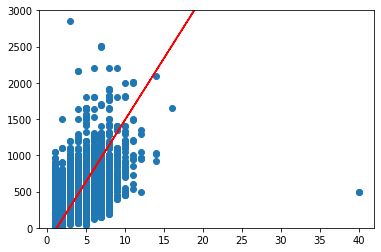

In [171]:
x = df.Banheiros
y = df.Metragem
plt.ylim(0,3000)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.scatter(x,y)

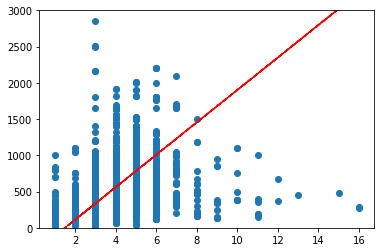

In [172]:
x = df.Quartos
y = df.Metragem
plt.ylim(0,3000)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.scatter(x,y)

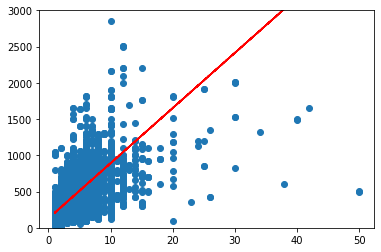

In [170]:
x = df.Vagas
y = df.Metragem
plt.ylim(0,3000)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.scatter(x,y)

É possível observar uma tendência em que quando se aumenta a metragem do imóvel, aumenta-se também o número de banheiros, quartos e vagas.

## 4 - Pegar outras estatísticas dos dados, média, mediana, min, max;

In [117]:
df.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,10008.000000,10008.000000,10008.000000,10008.000000,10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,442.300659,3.483114,3.879097,4.097222,NaN
std,NaN,NaN,NaN,7515.379389,1.064200,1.988467,2.824014,NaN
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,173.000000,3.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,290.000000,3.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,460.250000,4.000000,5.000000,5.000000,NaN


## 5 - Descobrir quais são os bairros que apresentam valores NaN para nome de ruas;

In [120]:
df[df.Rua.isnull()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64